<a href="https://colab.research.google.com/github/ara42/Deep-Learning/blob/main/%EC%BB%A4%EB%B8%8C%EB%84%B7_%ED%9B%88%EB%A0%A8%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


참고 교재: https://www.gilbut.co.kr/book/view?bookcode=BN003496

In [6]:
!unzip -qq '/content/drive/MyDrive/Colab Notebooks/Deep-Learning/dogs-vs-cats.zip'

In [7]:
!unzip -qq train.zip

In [8]:
import os, shutil, pathlib

In [9]:
original_dir = pathlib.Path('train')
new_base_dir = pathlib.Path('cats_vs_dogs_small')

In [10]:
def make_subset(subset_name,start_index,end_index):
    for category in ("cat","dog"):
        dir = new_base_dir/subset_name/category
        os.makedirs(dir)
        fnames = [f'{category}.{i}.jpg' for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir/fname,dst=dir/fname)

In [11]:
make_subset('train', start_index=0, end_index=1000)
make_subset('validation', start_index=1000, end_index=1500)
make_subset('test', start_index=1500, end_index=2500)

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers

In [13]:
inputs = keras.Input(shape=(180,180,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs,outputs)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [15]:
model.compile(loss = keras.losses.binary_crossentropy,
              metrics = ['accuracy'])

In [16]:
from keras.utils import image_dataset_from_directory

In [17]:
train_dataset = image_dataset_from_directory(
    new_base_dir/'train',
    image_size = (180,180),
    batch_size = 32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir/'validation',
    image_size = (180,180),
    batch_size = 32
)
test_dataset = image_dataset_from_directory(
    new_base_dir/'test',
    image_size = (180,180),
    batch_size = 32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [18]:
for data_batch, labels_batch in train_dataset:
    print(data_batch.shape, labels_batch.shape)
    break

(32, 180, 180, 3) (32,)


In [19]:
import matplotlib.pyplot as plt

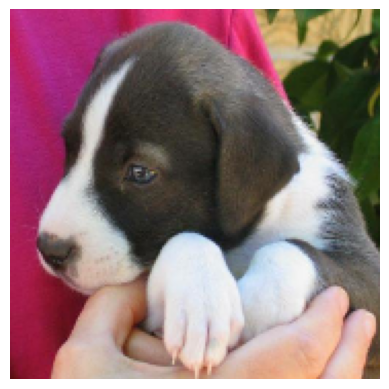

In [20]:
image = data_batch[0].numpy()
image = image.astype('int32')
plt.axis('off')
plt.imshow(image)
plt.show()

In [21]:
mcp = keras.callbacks.ModelCheckpoint(
    filepath = 'convet_from_scratch.keras',
    save_best_only = True,
    monitor = 'val_loss'
)
hist = model.fit(train_dataset,
                 epochs=30,
                 validation_data=validation_dataset,
                 callbacks=[mcp])

Epoch 1/30
63/63 [==============================] - 18s 83ms/step - loss: 0.7067 - accuracy: 0.5095 - val_loss: 0.6902 - val_accuracy: 0.5020
Epoch 2/30
63/63 [==============================] - 7s 110ms/step - loss: 0.6909 - accuracy: 0.5625 - val_loss: 0.6688 - val_accuracy: 0.6000
Epoch 3/30
63/63 [==============================] - 5s 83ms/step - loss: 0.6718 - accuracy: 0.5935 - val_loss: 0.6506 - val_accuracy: 0.6200
Epoch 4/30
63/63 [==============================] - 8s 117ms/step - loss: 0.6301 - accuracy: 0.6480 - val_loss: 0.6089 - val_accuracy: 0.6800
Epoch 5/30
63/63 [==============================] - 7s 110ms/step - loss: 0.6071 - accuracy: 0.6755 - val_loss: 0.6338 - val_accuracy: 0.6230
Epoch 6/30
63/63 [==============================] - 8s 129ms/step - loss: 0.5637 - accuracy: 0.7100 - val_loss: 0.5542 - val_accuracy: 0.7110
Epoch 7/30
63/63 [==============================] - 6s 89ms/step - loss: 0.5438 - accuracy: 0.7180 - val_loss: 0.5667 - val_accuracy: 0.7170
Epoch 8/

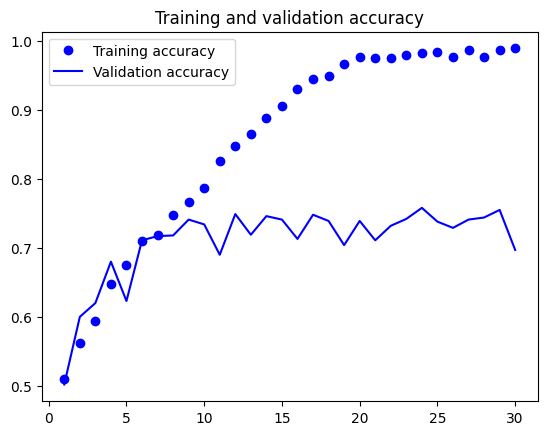

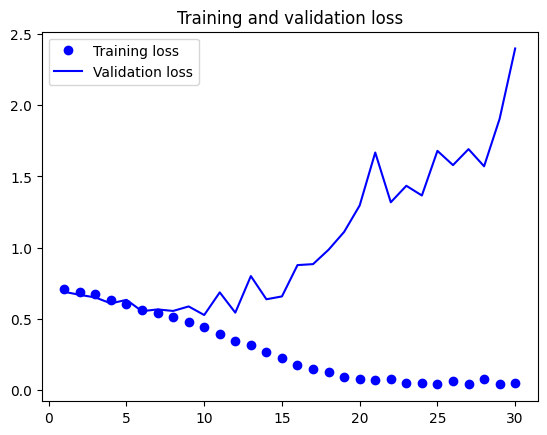

In [22]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
test_model = keras.models.load_model('convet_from_scratch.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도 : {test_acc:.3f}')

63/63 [==============================] - 3s 36ms/step - loss: 0.5848 - accuracy: 0.7225
테스트 정확도 : 0.723


In [24]:
da_model = keras.Sequential()
da_model.add(layers.RandomFlip('horizontal'))
da_model.add(layers.RandomRotation(0.1))
da_model.add(layers.RandomZoom(0.2))

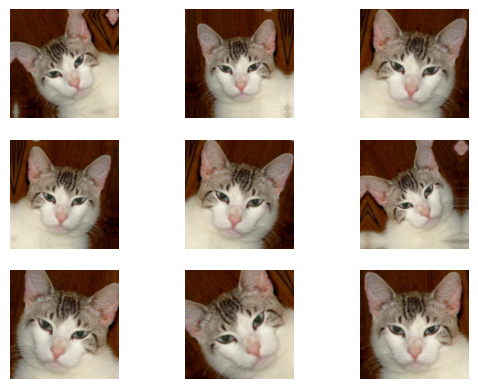

In [26]:
for images, _ in train_dataset.take(1):
    for i in range(9):
        da_images = da_model(images)
        ax = plt.subplot(3,3,i+1)
        plt.imshow(da_images[0].numpy().astype('uint8'))
        plt.axis('off')

In [30]:
inputs = keras.Input(shape=(180,180,3))
x = da_model(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs,outputs)

In [31]:
model.compile(loss = keras.losses.binary_crossentropy,
              metrics = ['accuracy'])
mcp = keras.callbacks.ModelCheckpoint(
    filepath = 'convet_from_scratch.keras',
    save_best_only = True,
    monitor = 'val_loss'
)
hist = model.fit(train_dataset,
                 epochs=100,
                 validation_data=validation_dataset,
                 callbacks=[mcp])

Epoch 1/100
63/63 [==============================] - 8s 79ms/step - loss: 0.7049 - accuracy: 0.5050 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 4s 67ms/step - loss: 0.6942 - accuracy: 0.5335 - val_loss: 0.6884 - val_accuracy: 0.5290
Epoch 3/100
63/63 [==============================] - 6s 94ms/step - loss: 0.6906 - accuracy: 0.5440 - val_loss: 0.6789 - val_accuracy: 0.5730
Epoch 4/100
63/63 [==============================] - 4s 66ms/step - loss: 0.6704 - accuracy: 0.5885 - val_loss: 0.6887 - val_accuracy: 0.5650
Epoch 5/100
63/63 [==============================] - 5s 71ms/step - loss: 0.6536 - accuracy: 0.6265 - val_loss: 0.6297 - val_accuracy: 0.6390
Epoch 6/100
63/63 [==============================] - 8s 112ms/step - loss: 0.6395 - accuracy: 0.6365 - val_loss: 0.6928 - val_accuracy: 0.6130
Epoch 7/100
63/63 [==============================] - 5s 68ms/step - loss: 0.6219 - accuracy: 0.6715 - val_loss: 0.6223 - val_accuracy: 0.6640
Epoch

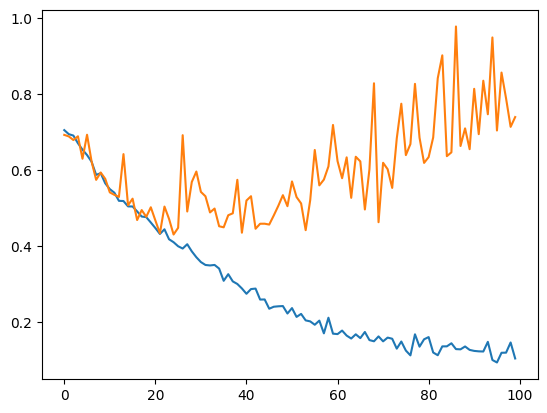

In [32]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

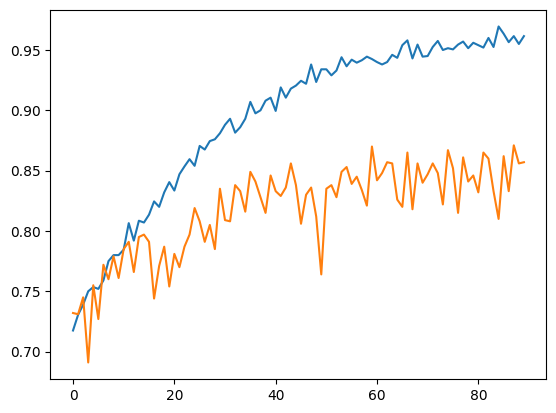

In [33]:
plt.plot(hist.history['accuracy'][10:])
plt.plot(hist.history['val_accuracy'][10:])
plt.show()

In [34]:
test_model = keras.models.load_model('convet_from_scratch.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도 : {test_acc:.3f}')

63/63 [==============================] - 4s 45ms/step - loss: 0.4789 - accuracy: 0.7910
테스트 정확도 : 0.791


## 사전 훈련된 모델 사용

In [35]:
conv_base = keras.applications.vgg16.VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (180,180,3)
)

58889256/58889256 [==============================] - 3s 0us/step


In [37]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [39]:
import numpy as np
from keras.applications import vgg16

In [43]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        pre_images = vgg16.preprocess_input(images)
        features = conv_base.predict(pre_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

In [44]:
x_train, y_train = get_features_and_labels(train_dataset)
x_val, y_val = get_features_and_labels(validation_dataset)
x_test, y_test = get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 35ms/step


In [45]:
x_train.shape

(2000, 5, 5, 512)

In [46]:
inputs = keras.Input(shape=(5,5,512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs,outputs)

In [47]:
model.compile(loss = keras.losses.binary_crossentropy,
              metrics = ['accuracy'])

In [48]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 5, 5, 512)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 12800)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               3277056   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 3,277,313
Trainable params: 3,277,313
Non-trainable params: 0
_________________________________________________________________


In [49]:
mcp = keras.callbacks.ModelCheckpoint(
    filepath = 'feature_exraction.keras',
    save_best_only = True,
    monitor = 'val_loss'
)
hist = model.fit(x_train, y_train, epochs=20, validation_data=(x_val,y_val), callbacks=[mcp])

Epoch 1/20
63/63 [==============================] - 2s 10ms/step - loss: 32.9111 - accuracy: 0.9140 - val_loss: 4.1861 - val_accuracy: 0.9700
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 4.5226 - accuracy: 0.9695 - val_loss: 5.5620 - val_accuracy: 0.9700
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.5486 - accuracy: 0.9850 - val_loss: 5.9863 - val_accuracy: 0.9680
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 2.0450 - accuracy: 0.9845 - val_loss: 4.7601 - val_accuracy: 0.9760
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 0.6822 - accuracy: 0.9955 - val_loss: 5.4184 - val_accuracy: 0.9710
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.5326 - accuracy: 0.9955 - val_loss: 3.0733 - val_accuracy: 0.9850
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.8238 - accuracy: 0.9960 - val_loss: 4.5078 - val_accuracy: 0.9770
Epoch 8/20
63/63 [

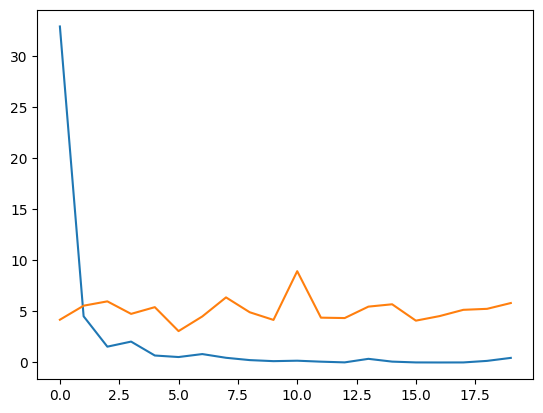

In [50]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

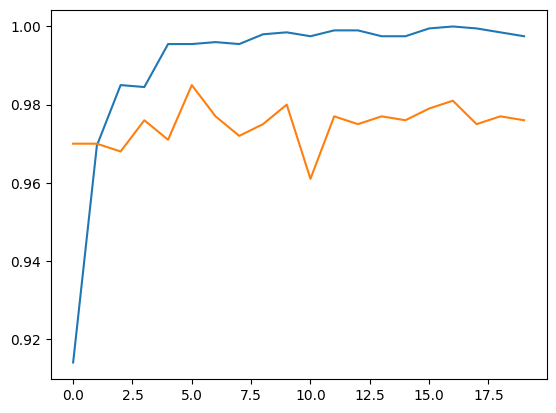

In [51]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

In [52]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 7.5046 - accuracy: 0.9685


[7.504624366760254, 0.968500018119812]

In [55]:
da_model = keras.Sequential()
da_model.add(layers.RandomFlip('horizontal'))
da_model.add(layers.RandomRotation(0.1))
da_model.add(layers.RandomZoom(0.2))

In [56]:
conv_base = vgg16.VGG16(
    weights = 'imagenet',
    include_top = False
)
conv_base.trainable = False #역전파에 의해 최적화 작업은 안함

In [58]:
inputs = keras.Input(shape=(180,180,3))
x = da_model(inputs)
x = vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

In [59]:
model.compile(loss = keras.losses.binary_crossentropy,
              metrics = ['accuracy'])
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem_1   (None, 180, 180, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_5 (Flatten)         (None, 12800)             0   

In [60]:
mcp = keras.callbacks.ModelCheckpoint(
    filepath = 'feature_exraction_a.keras',
    save_best_only = True,
    monitor = 'val_loss'
)
hist = model.fit(train_dataset, epochs=100, validation_data=validation_dataset, callbacks=[mcp])

Epoch 1/100
63/63 [==============================] - 13s 178ms/step - loss: 17.9259 - accuracy: 0.8980 - val_loss: 6.8767 - val_accuracy: 0.9580
Epoch 2/100
63/63 [==============================] - 10s 143ms/step - loss: 7.8570 - accuracy: 0.9370 - val_loss: 8.3480 - val_accuracy: 0.9570
Epoch 3/100
63/63 [==============================] - 11s 174ms/step - loss: 5.1060 - accuracy: 0.9580 - val_loss: 11.6089 - val_accuracy: 0.9540
Epoch 4/100
63/63 [==============================] - 9s 146ms/step - loss: 5.7367 - accuracy: 0.9600 - val_loss: 5.2528 - val_accuracy: 0.9650
Epoch 5/100
63/63 [==============================] - 10s 147ms/step - loss: 4.4217 - accuracy: 0.9635 - val_loss: 3.9224 - val_accuracy: 0.9740
Epoch 6/100
63/63 [==============================] - 9s 147ms/step - loss: 3.3651 - accuracy: 0.9715 - val_loss: 3.8000 - val_accuracy: 0.9730
Epoch 7/100
63/63 [==============================] - 11s 177ms/step - loss: 2.9600 - accuracy: 0.9715 - val_loss: 4.0936 - val_accuracy: